In [1]:
# Data analysis & wrangling
import numpy as np 
import pandas as pd 
import random as rnd
import string
import requests
import re

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/Varvara/spiced_working_files/final_project/NLP/langdetect/reviews_full_text.csv')
df

,asin,text,title,location_and_date,verified,rating,negative or positive
0,B07HBDNGHC,Auf die Funktion der Box gehe ich nur kurz ein...,"Die Toniebox: sehr teuer, sehr geliebt",Reviewed in Germany on 10 October 2022,True,4.0,positive
1,B07HBDNGHC,Ich hielt die Toniebox immer für einen Überteu...,Neutrale Bewertung der Toniebox nach über eine...,Reviewed in Germany on 2 April 2020,False,4.0,positive
2,B07HBDNGHC,"Die Box ist ein hübsches Gerät, leider ist sie...","Schönes Teil, leider nicht so robust wie gedacht",Reviewed in Germany on 22 November 2022,True,5.0,positive
3,B07HBDNGHC,Hier muss ich einfach bewerten!!!Bin super zuf...,Toniebox ist einfach super,Reviewed in Germany on 21 November 2022,True,5.0,positive
4,B07HBDNGHC,Wir Lieben die toniebox. Sie ist mega praktisc...,100% Empfehlung,Reviewed in Germany on 28 November 2022,True,5.0,positive
...,...,...,...,...,...,...,...
5958,B000NJWLHS,"Super schnelle Lieferung ,hervorragende Qualit...",Tolles Weinachtsgescheng,Reviewed in Germany on 8 January 2022,True,5.0,positive
5959,B000NJWLHS,Unsere Enkeltochter hat es zum Geburtstag beko...,Super Geburtstagsgeschenk,Reviewed in Germany on 19 May 2021,True,5.0,positive
5960,B000NJWLHS,"Die Farben waren teilweise angetrocknet, so da...",Farben teilweise angetrocknet,Reviewed in Germany 🇩🇪 on 22 January 2021,True,3.0,positive
5961,B000NJWLHS,an Amazon: aus dem Programm nehmen!,"völlig ungeeignet,",Reviewed in Germany 🇩🇪 on 18 June 2020,True,1.0,positive


In [3]:
df['reviews']=df['text']+df['title']
df['reviews'][0]

'Auf die Funktion der Box gehe ich nur kurz ein, da die Toniebox doch sehr bekannt ist und das Prinzip sogar für einen 2 jährigen leicht verständlich ist.Die Box wurde schnell geliefert, gibt es in schönen Farben (beim starter Set mit kreativ Tonie), ist nicht zu groß, so das kleine Kinder es gut herumtragen können, ist Ummantelt mit leicht gefütterten robusten Stoff und somit recht robust und auch sicher für Kinder.Es hat 2 Ohren für laut und leise.Für das Einrichten wird WLan benötigt. Wird ein Tonie drauf gesetzt, spielt es direkt ab. Leuchtet es blau, so wird der Inhalt während dem abspielen herunter geladen. Grün bedeutet alles super und rot/Orange das die Batterie bald alle ist.Haut man seitlich auf die Box so kann man ein Kapitel vor oder zurück springen.Der Ton ist an sich okay bis gut aber nicht herausragend und für den hohen Preis gerade noch akzeptabel.Die Figuren dafür sind niedlich und werden ebenfalls gerne bespielt. Nachteil hier ist, dass die Farbe der Tonies bei uns St

In [4]:
import google_lang

In [5]:
from google_lang.google_trans_new1 import google_translator

In [6]:
# translator = google_translator()
# translate_text = translator.translate(df.reviews,lang_tgt='en') 

# print(translate_text)

In [7]:
from langdetect import detect
#simple function to detect and translate text 
def detect_and_translate(text,target_lang='en'):
    
    result_lang = detect(text)
    
    if result_lang == target_lang:
        return text 
    
    else:
        translator = google_translator()
        translate_text = translator.translate(text,lang_src=result_lang,lang_tgt=target_lang)
        return translate_text 

In [8]:
text= df['reviews'][0]

In [20]:
detect_and_translate(text)

"I only go into the function of the box briefly, since the Toniebox is very well known and the principle is even easy to understand for a 2 year old. The box was delivered quickly, there are beautiful colors (in the starter set with creative tonie), If it is not too big, that small children can carry it around, it is covered with slightly lined robust fabric and therefore quite robust and also safe for children. It has 2 ears for loud and quiet. If a tone is put on it, it plays directly. If it lights up blue, the content is downloaded during play. Green means great and red/orange that the battery will soon be all. The figures for this are cute and are also happy to be played. The disadvantage here is that the color of the tonies left strips on the smooth white surface of the box when the children put it too roughly on the box. Does not look nice, but the biggest disadvantage is the always violent price. The box does nothing without these expensive small figures and these cost 17 € and 

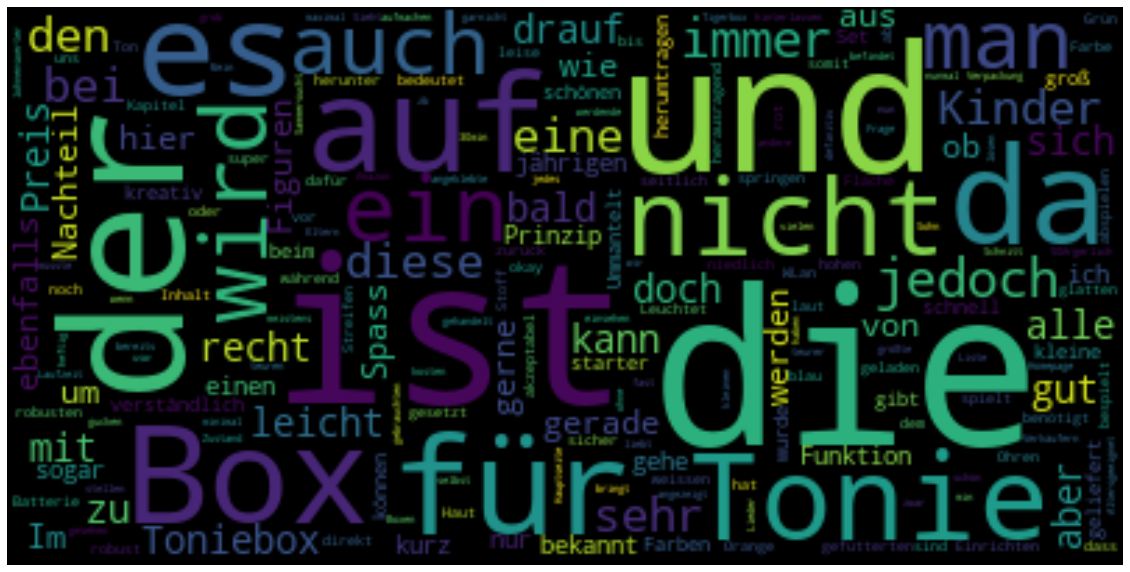

In [21]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('cloud1.png')
plt.show()

In [15]:
text1=df['reviews'].astype(str)
text1

0       Auf die Funktion der Box gehe ich nur kurz ein...
1       Ich hielt die Toniebox immer für einen Überteu...
2       Die Box ist ein hübsches Gerät, leider ist sie...
3       Hier muss ich einfach bewerten!!!Bin super zuf...
4       Wir Lieben die toniebox. Sie ist mega praktisc...
                              ...                        
5958    Super schnelle Lieferung ,hervorragende Qualit...
5959    Unsere Enkeltochter hat es zum Geburtstag beko...
5960    Die Farben waren teilweise angetrocknet, so da...
5961    an Amazon: aus dem Programm nehmen!völlig unge...
5962    Da proprio l'idea di essere stato spedito già ...
Name: reviews, Length: 5963, dtype: object

In [18]:
#text1.apply(detect_and_translate)

In [ ]:
#df.to_csv('translated_reviews.csv', index=False)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('german')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Varvara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Varvara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Varvara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Varvara/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [31]:
nltk.download('punkt')
nltk.download('stopwords')

stemmer = SnowballStemmer("german")
stop_words = set(stopwords.words("german"))


def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    RE_EMOJI = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)
    text = re.sub(RE_EMOJI, " ", text)
  
    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

[nltk_data] Downloading package punkt to /Users/Varvara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Varvara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df['reviews'] = df['reviews'].astype(str)
df['reviews'] = df['reviews'].apply(clean_text)
# Drop when any of x missing
df["grade_bad"] = 0
df.loc[df["rating"] >= 3, "grade_bad"] = np.NaN
df.loc[df["rating"] >= 5, "grade_bad"] = 1

# Drop when any of x missing
df = df[(df["reviews"] != "") & (df["reviews"] != "null")]

df = df.dropna(
    axis="index", subset=["grade_bad", "reviews", "reviews"]
).reset_index(drop=True)

In [33]:
df.reviews

0       box hubsch gerat leid robust gerat kind erwart...
1       einfach bewert sup zufried toniebox seid mai s...
2       lieb toniebox mega praktisch sup leicht bedi g...
3       box oftmal unterschatzt wer besitzt mocht mehr...
4       sup schnell liefer kind ideal freud zuhor mits...
                              ...                        
3546                    geschenk testung moglich geschenk
3547    sup schnell liefer hervorrag qualitat perdelie...
3548    enkeltocht geburtstag bekomm darub riesig gefr...
3549               amazon programm nehm vollig ungeeignet
3550    proprio idea di ess stato spedito già rovinato...
Name: reviews, Length: 3551, dtype: object

In [34]:
!pip install langdetect
from langdetect import detect
from tqdm import tqdm_notebook
tqdm_notebook().pandas()
df['lang'] = df.reviews.progress_map(detect)
df = df.loc[df.lang=='en']

0it [00:00, ?it/s]

  0%|          | 0/3551 [00:00<?, ?it/s]

In [35]:
df

,asin,text,title,location_and_date,verified,rating,negative or positive,reviews,grade_bad,lang
17,B07MV3DYGJ,Wartet auf jeden Fall bis der Pack im Angebot ...,"Tolle Auswahl an Knete, regelmäßig im Angebot",Reviewed in Germany 🇩🇪 on 30 October 2022,True,5.0,positive,wartet fall pack angebot regelmass fall dos so...,1.0,en
21,B07MV3DYGJ,After less than one month became dry. Not a go...,Become dry,Reviewed in Germany 🇩🇪 on 28 November 2022,True,2.0,negative,aft less than one month becam dry not good qua...,0.0,en
41,B08LSDKWRW,Die tonie war offen,Die tonie was offen,Reviewed in Germany 🇩🇪 on 24 October 2022,True,2.0,negative,toni offendi toni off,0.0,en
89,B09BG5XG95,Terrible device that is very limited,Useless,Reviewed in Germany on 24 November 2022,True,1.0,negative,terribl devic that is very limiteduseless,0.0,en
111,B00VNYDEGO,Wir haben als Erwachsene schon so viel Spaß mi...,Top Spiel - nicht nur für Kinder,Reviewed in Germany 🇩🇪 on 19 November 2022,True,5.0,positive,erwachs schon spass spiel gehabt prima party s...,1.0,en
...,...,...,...,...,...,...,...,...,...,...
3508,B09D5Y2WCY,I bought this as a birthday gift for my grandd...,assembly is a total nightmare,Reviewed in the United States on 15 November 2022,True,1.0,negative,bought this as birthday gift for my granddaugh...,0.0,en
3509,B09D5Y2WCY,Not worth the price,"Pieces damaged, couldn't find screws. My son f...",Reviewed in the United States on 19 July 2022,True,1.0,negative,not worth the pricepiec damaged couldn find sc...,0.0,en
3522,B09J5BJWY5,Schöne Lieder . Mein Kind 15 Monate liebt dies...,Schöne Lieder,Reviewed in Germany on 17 November 2022,True,5.0,positive,schon lied kind monat liebt toni figurschon lied,1.0,en
3539,B07Y2TM2SB,Very disappointed in this item and very much q...,light weight and sharp,Reviewed in the United Kingdom on 18 November ...,True,1.0,positive,very disappointed this item and very much ques...,0.0,en


In [38]:
df['reviews'] = df['reviews'].astype(str)
df['reviews'] = df['reviews'].apply(detect_and_translate)

In [39]:
df

,asin,text,title,location_and_date,verified,rating,negative or positive,reviews,grade_bad,lang
17,B07MV3DYGJ,Wartet auf jeden Fall bis der Pack im Angebot ...,"Tolle Auswahl an Knete, regelmäßig im Angebot",Reviewed in Germany 🇩🇪 on 30 October 2022,True,5.0,positive,Wait case pack offer regular dimensions case s...,1.0,en
21,B07MV3DYGJ,After less than one month became dry. Not a go...,Become dry,Reviewed in Germany 🇩🇪 on 28 November 2022,True,2.0,negative,aft less than one month becam dry not good qua...,0.0,en
41,B08LSDKWRW,Die tonie war offen,Die tonie was offen,Reviewed in Germany 🇩🇪 on 24 October 2022,True,2.0,negative,toni offendi toni off,0.0,en
89,B09BG5XG95,Terrible device that is very limited,Useless,Reviewed in Germany on 24 November 2022,True,1.0,negative,terribl devic that is very limiteduseless,0.0,en
111,B00VNYDEGO,Wir haben als Erwachsene schon so viel Spaß mi...,Top Spiel - nicht nur für Kinder,Reviewed in Germany 🇩🇪 on 19 November 2022,True,5.0,positive,Adults already had fun game great party game c...,1.0,en
...,...,...,...,...,...,...,...,...,...,...
3508,B09D5Y2WCY,I bought this as a birthday gift for my grandd...,assembly is a total nightmare,Reviewed in the United States on 15 November 2022,True,1.0,negative,bought this as birthday gift for my granddaugh...,0.0,en
3509,B09D5Y2WCY,Not worth the price,"Pieces damaged, couldn't find screws. My son f...",Reviewed in the United States on 19 July 2022,True,1.0,negative,not worth the pricepiec damaged couldn find sc...,0.0,en
3522,B09J5BJWY5,Schöne Lieder . Mein Kind 15 Monate liebt dies...,Schöne Lieder,Reviewed in Germany on 17 November 2022,True,5.0,positive,schon lied kind monat liebt toni figurschon lied,1.0,en
3539,B07Y2TM2SB,Very disappointed in this item and very much q...,light weight and sharp,Reviewed in the United Kingdom on 18 November ...,True,1.0,positive,very disappointed this item and very much ques...,0.0,en


In [40]:
df.to_csv('translated_reviews.csv', index=False)